In [3]:
import pandas as pd
import numpy as np

## Merge

In [3]:
# Concat
# Concatenating pandas objects together with concat()
dataframe = pd.DataFrame(np.random.randn(10, 4))
dataframe

,0,1,2,3
0,-0.143054,0.390261,0.215331,0.775094
1,-0.700171,-1.644171,0.939819,-0.173220
2,-0.428872,0.283614,0.750079,-0.934343
3,-0.265991,-0.078617,0.549853,-0.183425
4,1.135319,-0.639748,-0.626881,-2.230439
5,0.010207,-0.046021,0.510129,0.253797
6,0.069515,0.288198,-0.186578,0.416079
7,2.363906,-0.230093,0.479724,-1.401625
8,-1.330066,-1.189627,1.174555,1.367101
9,-1.063976,-1.708118,-1.088307,0.077543


In [6]:
# break it into pieces
pieces=[dataframe[:3], dataframe[3:7], dataframe[7:]]

In [7]:
pd.concat(pieces)

,0,1,2,3
0,-0.143054,0.390261,0.215331,0.775094
1,-0.700171,-1.644171,0.939819,-0.173220
2,-0.428872,0.283614,0.750079,-0.934343
3,-0.265991,-0.078617,0.549853,-0.183425
4,1.135319,-0.639748,-0.626881,-2.230439
5,0.010207,-0.046021,0.510129,0.253797
6,0.069515,0.288198,-0.186578,0.416079
7,2.363906,-0.230093,0.479724,-1.401625
8,-1.330066,-1.189627,1.174555,1.367101
9,-1.063976,-1.708118,-1.088307,0.077543


In [8]:
# Join

In [9]:
# SQL style merges
left = pd.DataFrame({"key":["foo","foo"],"lval":[1,2]})
right = pd.DataFrame({"key":["foo","foo"],"rval":[4,5]})

In [10]:
left

,key,lval
0,foo,1
1,foo,2


In [11]:
right

,key,rval
0,foo,4
1,foo,5


In [12]:
pd.merge(left, right, on = "key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [13]:
dataframe.iloc[3]

0   -0.265991
1   -0.078617
2    0.549853
3   -0.183425
Name: 3, dtype: float64

In [14]:
# Append

In [15]:
# Append rows to a dataframe
dataframe = pd.DataFrame(np.random.randn(8, 4), columns = ["A","B","C","D"])
dataframe

,A,B,C,D
0,0.644308,-1.646477,-0.121341,-1.446193
1,-1.358342,-1.018854,-1.598753,1.058875
2,1.171853,-0.758301,0.553614,-1.474973
3,1.670910,0.799298,1.517104,0.123332
4,-0.909327,-1.472800,0.002584,2.734709
5,-0.982986,0.029687,-0.901524,1.532227
6,-0.356536,0.201973,-1.293910,0.518464
7,0.448991,-1.739493,-0.850405,-0.083699


In [16]:
s = dataframe.iloc[3]

In [17]:
dataframe.append(s, ignore_index=True)

,A,B,C,D
0,0.644308,-1.646477,-0.121341,-1.446193
1,-1.358342,-1.018854,-1.598753,1.058875
2,1.171853,-0.758301,0.553614,-1.474973
3,1.670910,0.799298,1.517104,0.123332
4,-0.909327,-1.472800,0.002584,2.734709
5,-0.982986,0.029687,-0.901524,1.532227
6,-0.356536,0.201973,-1.293910,0.518464
7,0.448991,-1.739493,-0.850405,-0.083699
8,1.670910,0.799298,1.517104,0.123332


In [18]:
# Grouping
dataframe = pd.DataFrame({"A": ["foo","bar","foo", "bar",
                                "foo","bar","foo","foo"],
                          "B": ["one","one","two","three",
                                "two","two","one","three"],
                          "C": np.random.randn(8),
                          "D": np.random.randn(8)})
dataframe

,A,B,C,D
0,foo,one,1.120839,-0.094152
1,bar,one,-0.130468,0.560249
2,foo,two,0.453944,0.107736
3,bar,three,1.298922,0.633046
4,foo,two,0.346176,0.454483
5,bar,two,-0.634286,0.012556
6,foo,one,0.738387,0.295532
7,foo,three,1.799102,-1.124503


In [19]:
# Grouping and then applying a function sum to the resulting groups.
dataframe.groupby("A").sum()

,C,D
A,,
bar,0.534169,1.205851
foo,4.458449,-0.360904


In [21]:
# Grouping by multiple columns forms a hierarchical index, which we then apply the function
dataframe.groupby(["A","B"]).sum()

C         D
A   B                        
bar one   -0.130468  0.560249
    three  1.298922  0.633046
    two   -0.634286  0.012556
foo one    1.859227  0.201380
    three  1.799102 -1.124503
    two    0.800120  0.562219

In [1]:
#Reshaping

In [4]:
#Stack
tuples = list(zip(*[["bar","bar","baz","baz",
                     "foo","foo","qux","qux"],
                    ["one","two","one","two",
                     "one","two","one","two"]]))
index = pd.MultiIndex.from_tuples(tuples, names =["first","second"])
df = pd.DataFrame(np.random.randn(8, 2), index = index, columns = ["A","B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.268562  1.645837
      two    -0.140188 -0.794736
baz   one    -2.983942 -0.498729
      two     0.514171 -0.696796

In [6]:
# The stack() method “compresses” a level in the DataFrame’s columns.
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.268562
               B    1.645837
       two     A   -0.140188
               B   -0.794736
baz    one     A   -2.983942
               B   -0.498729
       two     A    0.514171
               B   -0.696796
dtype: float64

In [7]:
stacked.unstack()

A         B
first second                    
bar   one     0.268562  1.645837
      two    -0.140188 -0.794736
baz   one    -2.983942 -0.498729
      two     0.514171 -0.696796

In [8]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.268562 -0.140188
      B  1.645837 -0.794736
baz   A -2.983942  0.514171
      B -0.498729 -0.696796

In [9]:
#Pivot Tables

In [10]:
dataframe = pd.DataFrame({"A":["one","one","two","three"]* 3,
                          "B":["A","B","C"] * 4,
                          "C":["foo","foo","foo","bar","bar","bar"] * 2,
                          "D":np.random.randn(12),
                          "E":np.random.randn(12)})
dataframe

,A,B,C,D,E
0,one,A,foo,-1.785640,0.461053
1,one,B,foo,-0.906063,-1.725737
2,two,C,foo,-1.109801,0.834087
3,three,A,bar,-1.787759,1.828586
4,one,B,bar,-0.630323,0.298369
5,one,C,bar,-0.359092,1.333223
6,two,A,foo,0.932230,-1.195943
7,three,B,foo,-1.054150,-0.539787
8,one,C,foo,1.042044,0.689219
9,one,A,bar,0.525570,0.130676


In [11]:
pd.pivot_table(dataframe, values = "D", index =["A","B"], columns = ["C"])

C             bar       foo
A     B                    
one   A  0.525570 -1.785640
      B -0.630323 -0.906063
      C -0.359092  1.042044
three A -1.787759       NaN
      B       NaN -1.054150
      C -1.659178       NaN
two   A       NaN  0.932230
      B -0.065350       NaN
      C       NaN -1.109801

In [12]:
# Categoricals

In [14]:
# pandas can include categorical data in a DataFrame
df = pd.DataFrame({"id":[1,2,3,4,5,6],"raw_grade":["a","b","b","a","a","b"]})

In [16]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    b
Name: grade, dtype: category
Categories (2, object): ['a', 'b']

In [17]:
# plotting

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

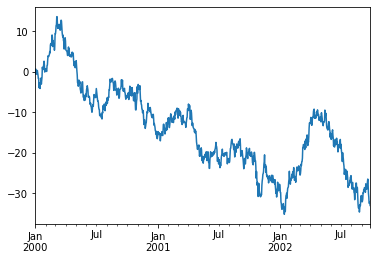

In [26]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

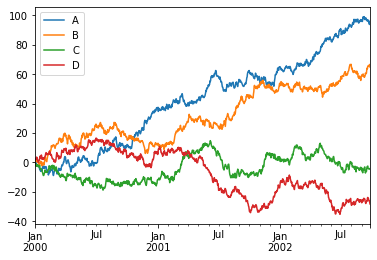

In [27]:
# On DataFrame, plot() is a convenience to plot all of the columns with labels
df = pd.DataFrame(np.random.randn(1000, 4), index = ts.index, columns = ["A","B","C","D"])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc = "best")

In [28]:
df

,A,B,C,D
2000-01-01,1.389843,0.976379,-0.453862,1.944140
2000-01-02,-0.064855,0.148582,-2.301227,2.758272
2000-01-03,-0.075363,1.948264,-1.543509,2.410055
2000-01-04,-1.548712,0.583540,-2.660616,2.232809
2000-01-05,-1.330233,0.701227,-2.437219,3.547791
...,...,...,...,...
2002-09-22,95.003704,65.684110,-4.447473,-25.779908
2002-09-23,94.996175,65.766871,-4.261286,-26.245449
2002-09-24,93.751492,66.579418,-4.310418,-26.119878
2002-09-25,95.389473,66.324097,-4.239586,-27.645878


In [30]:
# Gotchas
# If you are trying an operation and you see an exception like:
if pd.Series([False,True,False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().